# **データマイニングと情報可視化: 演習**
# **Data mining and information visualization: Exercise**
<font size="4">
第6回　2024年1月23日(火)<br>
データマイニング手法3-1：回帰分析（講義と分析手法の基礎）<br>
Method 3-1: Regression (Lecture and basic skills)<br>
</font>

[レポート / Assignment](Rep_Week6.ipynb) : <span style="color: black;font-weight:bold;" >締め切り 2024年1月26日(金)　23:59 JST</span>

### 講義動画
* [解説動画](https://youtu.be/l8pNZ1MAH5w)

In [1]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn
from sklearn import linear_model

# 小数第3位まで表示 / display up to the 3rd decimal place
%precision 3

'%.3f'

# 線形単回帰分析 / Simple linear regression analysis

ここでは単回帰分析のうちでも、アウトプットとインプットが線形の関係に成り立つ（ $ y = ax + b $ ）ことを前提とした線形単回帰という手法で回帰問題を解く方法を説明します。<br>
線形単回帰分析は、Scikit-learnというライブラリに用意されている`sklearn.linear_model`を使うと簡単に計算できます。Scikit-learnは機械学習のためのパッケージです。このパッケージは、後の機械学習の章で、さらにさまざまな計算をする場面でも利用します。まず、以下のように`linear_model`をインポートした後、インスタンスを作ります。<br>
<br>
Here we practice how to carry out simple linear regression analysis.<br>
This method enables us to estimate a value, $y$, with a single explanatory variable, $x$, based on a linear relation between the two variables, （ $ y = ax + b $ ）.<br>
You can easily excute a simple linear regression by using `sklearn.linear_model` in Scikit-learn library.<br>
Scikit-learn is a package for machine learning, as we used in clustering analysis.<br>
First, we need to import `linear_model`, then creat an instance as follows.<br>
<br>
[参考サイト：scikit-learn で線形回帰 (単回帰分析・重回帰分析)](https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0)<br>
[Reference: sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


## Case 1: サンプルデータを用いて、単回帰分析を行う。
Case 1: Analyze sample data with simple linear regression.

### (0-1) 乱数を生成する関数を使って、データを作る。

In [2]:
# 乱数を生成する関数を用いて、テストデータを用意する / Prepare a data set with random generator.
a = 1.0                                                 # 回帰定数(直線の傾き) / Regression coefficient (slope of the linear function)
b = 0.5                                                 # 回帰定数(y切片) / Regression constant (y-intercept)
x = np.arange(1.0, 8.0, 0.02)                            # 横軸を作成 / create an array for a vertical axis
noise = np.random.normal(loc=0, scale=0.5, size=len(x)) # ガウシアンノイズを生成 / geterate random numbers of Gaussian distribution
#                     loc: mean, scale: standard deviation, size=number of random numbers
y = a * x + b + noise                                   # 学習用サンプルデータ / obtain y value by substituting x to the sample function.

### (0-2) CSVファイルから読み込む
乱数を生成させるコードの内容が分からない場合は、CSVファイル（w6_lineardata.csv）を読み込んでしまいましょう。
a
[Week 2: read csv](Ex_Week2.ipynb#readcsv)

In [3]:
# csvファイルをPandasで読み込み

# Numpy配列に変換


In [4]:
# csvファイルをNumpyで読み込み


### (1) データ(x, y)を散布図でプロットしてください。 / Plot a data (x, y) with a scattering plot.
[Week 4: Scattering plot](Ex_Week4.ipynb#scatterplot)

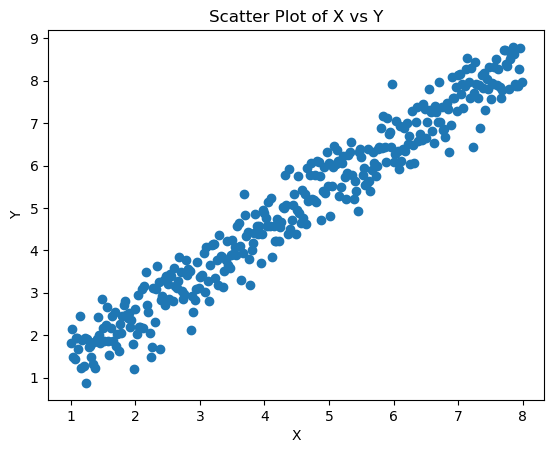

In [5]:
plt.scatter(x, y)
plt.xlabel('X')  # x軸のラベル
plt.ylabel('Y')  # y軸のラベル
plt.title('Scatter Plot of X vs Y')  # グラフのタイトル
plt.show()

### (2) scikit-learnの`.fit`ではデータの次元を明示する必要がある
### Data dimension has to be defined explicitly for the analysis with model.fit of scikit-learn.

In [6]:
# shapeを確認 / check the size of the array
print(np.shape(x))
print(np.shape(y))

(350,)
(350,)


<b>(350,)だと、「1列」ということが明示されていないので、`reshape`を使って1列であることを明示します。</b>

In [7]:
# reshapeを使って各データを1Dデータと明示する / Define the dimension of the array explicitly with reshape.
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [8]:
# shapeを確認（reshapeの効果を確認する）/ check the size of the array again, then verify how reshape works.
print(np.shape(x))
print(np.shape(y))

(350, 1)
(350, 1)


(350, 1) となりました。1列だと明示されています。

### (3) 線形回帰をする / Apply linear regression.

以下では、説明変数（$X$とします）と目的変数（$Y$とします）データをセットして、線形回帰する`fit`という機能を使って、予測モデルを計算します。<br>
この場合の`fit`関数は、**最小二乗法**という手法で回帰係数$a$と切片(回帰定数)$b$を計算しています。<br>
この方法は、実際の目的変数のデータと予測したデータの差の二乗和($E^2$)をとり、それが最小になる時の直線の傾きと切片を求めるものです。<br>
式で表現すると、$y$を実測値、$ f(x) = ax + b $を予測値として、以下の式を最小にするように計算しています。<br>
<br>
Here, we are going to obtain predictive modelling, $ y = ax + b $, by using `fit` function for simple linear regression.<br>
The function `fit` estimate the fitting parameters $a$ and $b$ by **the least squares method**.<br>
With this method, the slope and the y-intercept are calculated so that the square error ($E^2$) to be minimum.<br>
$f(x_i)$ is calculated with the prediction model, $ f(x) = ax + b $.<br>
Please look into the detail of this model by yourself if you want to know more.<br>
For the analysis, you can simply use the function, `fit`.

\begin{eqnarray}
E^2 = \sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [9]:
# 線形回帰のインスタンスを生成 / create an instance of simple regression
# スライド51ページ目参照
model = linear_model.LinearRegression()

In [10]:
# 学習実行 / apply fit
# スライド52ページ目参照
model.fit(x, y)

LinearRegression()

In [11]:
# xに対する予測値を計算 / obtain the predicted value.
# スライド53ページ目参照
reg_y = model.predict(x)

### (4) パラメータ算出 / Calculate important parameters

<img src="img/w6_LinearRegression.png" width="600px">

In [12]:
# 回帰係数 / Regression coefficient
reg_a = model.coef_

# 回帰定数 / Regression constant
reg_b = model.intercept_

# .predict(x)で得られたxに対する予測値は、回帰係数と回帰定数を使って以下のように計算したものと同じ。
# reg_y = reg_a*x+reg_b

# 決定係数 / Coefficient of determination
r2 = model.score(x, y)                                 
print(reg_a)
print(reg_b)
print(r2)

[[1.009]]
[0.467]
0.951247822635795


### 決定係数とは / the coefficient of determination 
どの程度うまく予測できるかどうかを数値化したものが、**決定係数**です。決定係数は寄与率とも呼ばれます。<br>
定義は以下のとおりです。決定係数は$R^2$と示すことが一般的です。

\begin{eqnarray}
R^2 = 1 - \frac{\sum_{i = 1}^n(y_i - f(x_i))^2}{\sum_{i = 1}^{n}(y_i - \bar{y})^2}
\end{eqnarray}

**$R^2$は最大で1の値を取り、1に近ければ近いほど良いモデル**になります。$\bar{y}$は目的変数の平均値です。<br>
説明変数を使わずに常に$\bar{y}$（定数）で予測した場合と二乗誤差が等しい場合に $R^2=0$ となります。<br>
Pythonを使って決定係数を求めるには、`score`を使います。<br>
なお、この決定係数の数値がどこまで高ければ良いのかという問題はあります。<br>
教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せることはなく、それをどう判断するかはケースバイケースです。<br>
<br>
$R^2$ can be from 0 to 1. If it is close to 1, it means that the model works well. $\bar{y}$ is the average of the objective variable, $y$.<br>
If you predict a model with $\bar{y}$, the square error becomes 0 and $R^2=0$.<br>
You can obtain the coefficient of determination with `score`.<br>
The high coefficient of determination doesn't always mean the model's validity. We need to judge with several parameters case by case.<br>

### (5) 描画 / Visualization

[参考サイト:【matplotlib基礎】複数のグラフを重ねて表示する](https://qiita.com/trami/items/b501abe7667e55ab2c9f)

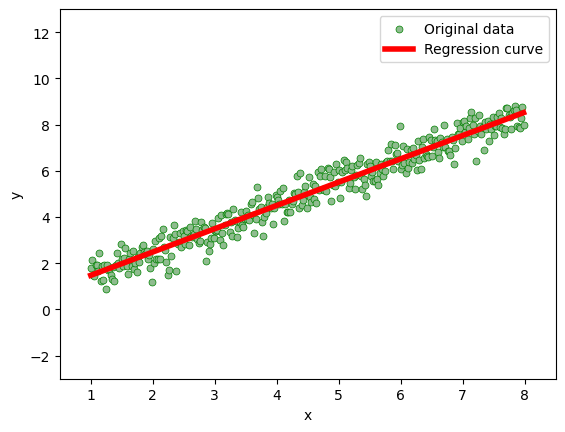

In [13]:
# fig, axオブジェクトの作成
fig, ax1 = plt.subplots()

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。/ Plot data. Set label, thickness and the position of the legend.
ax1.scatter(x, y, label='Original data', s=100, c='darkseagreen', marker='.', alpha=1, linewidth=0.5, edgecolors='green')
ax1.plot(x, reg_y, label='Regression curve', linewidth=4, color='red')

# reg_y = reg_a*x+reg_b
# ax1.plot(x, reg_a*x+reg_b, label='Regression curve', linewidth=3, color='red')


# グラフを表示する。/ Display a figure.
plt.legend()

ax1.set_xlim([0.5, 8.5])
ax1.set_ylim([-3, 13])

# 軸のラベルを設定する。/ Set label of the axes.
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# save as png
# plt.savefig('img/w6_SimpleRegression_0p5.png', format="png", dpi=300)

plt.show()
plt.close()


## データのばらつき具合の違うデータを比較してみよう。
Let's compare the results with different dispersions.

(0-1) で乱数を発生させるときに、ばらつき具合のパラメータ(scale)を変化させて、ばらつき具合の違うデータを生成し、
同様に線形単回帰分析をしてみましょう。


<img src="img/w6_SimpleRegression_sigma.png" width="800px">

In [14]:
# scaleを変えて、自分で単回帰分析してみましょう。
# 決定係数がどうなるか、調べてみてください。
a = 1.0                                                 # 回帰定数(直線の傾き) / Regression coefficient (slope of the linear function)
b = 0.5                                                 # 回帰定数(y切片) / Regression constant (y-intercept)
x2 = np.arange(1.0, 8.0, 0.02)                            # 横軸を作成 / create an array for a vertical axis
noise = np.random.normal(loc=0, scale=1.5, size=len(x2)) # ガウシアンノイズを生成 / geterate random numbers of Gaussian distribution
#                     loc: mean, scale: standard deviation, size=number of random numbers
y2 = a * x2 + b + noise                                   # 学習用サンプルデータ / obtain y value by substituting x to the sample function.

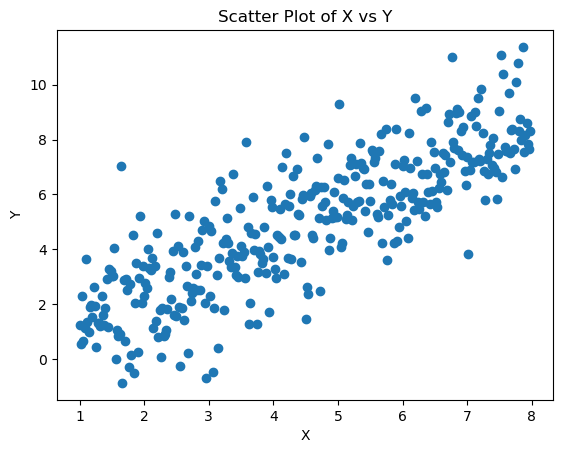

In [15]:
plt.scatter(x2, y2)
plt.xlabel('X')  # x軸のラベル
plt.ylabel('Y')  # y軸のラベル
plt.title('Scatter Plot of X vs Y')  # グラフのタイトル
plt.show()

In [16]:
x2 = x2.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

In [17]:
print(np.shape(x2))
print(np.shape(y2))

(350, 1)
(350, 1)


In [18]:
model.fit(x2, y2)
reg_y2 = model.predict(x2)

In [19]:
# 回帰係数 / Regression coefficient
reg_a = model.coef_

# 回帰定数 / Regression constant
reg_b = model.intercept_

# .predict(x)で得られたxに対する予測値は、回帰係数と回帰定数を使って以下のように計算したものと同じ。
# reg_y = reg_a*x+reg_b

# 決定係数 / Coefficient of determination
r2 = model.score(x2, y2)                                 
print(reg_a)
print(reg_b)
print(r2)

[[1.047]]
[0.266]
0.6909181154342856


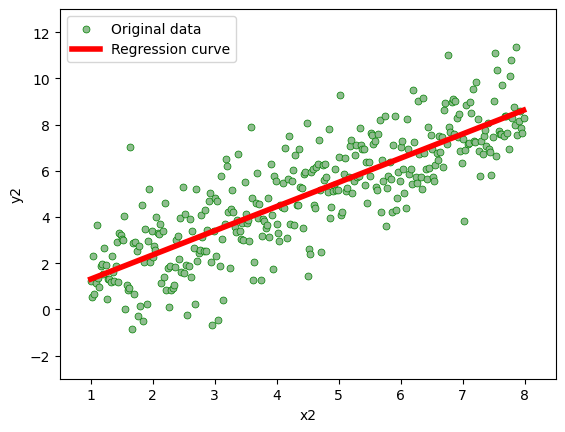

In [20]:
# fig, axオブジェクトの作成
fig, ax1 = plt.subplots()

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。/ Plot data. Set label, thickness and the position of the legend.
ax1.scatter(x2, y2, label='Original data', s=100, c='darkseagreen', marker='.', alpha=1, linewidth=0.5, edgecolors='green')
ax1.plot(x2, reg_y2, label='Regression curve', linewidth=4, color='red')

# reg_y = reg_a*x+reg_b
# ax1.plot(x, reg_a*x+reg_b, label='Regression curve', linewidth=3, color='red')


# グラフを表示する。/ Display a figure.
plt.legend()

ax1.set_xlim([0.5, 8.5])
ax1.set_ylim([-3, 13])

# 軸のラベルを設定する。/ Set label of the axes.
ax1.set_xlabel('x2')
ax1.set_ylabel('y2')

# save as png
# plt.savefig('img/w6_SimpleRegression_0p5.png', format="png", dpi=300)

plt.show()
plt.close()

## 決定係数からモデルの精度を検証 / Evaluate the precision of the model by the coefficients.
サンプルデータ自体は、同じ関数を用いているので、回帰係数と回帰定数はほぼ同じ値になります。<br>
標準偏差が大きいデータのほうが、決定係数が低くなっているのが分かります。<br>
<br>
We used the same function to create sample data, so we obtained regression coefficient and regression constant nearly identical.<br>
However, we can see that the coefficient of determination becomes smaller with the data produced with larger standard deviation.<br>

| 標準偏差 / Standard deviation (scale) | 0.5 | 1.5 |
| :-: | :-: | :-: |
| 回帰係数 / Regression coeff. |  1.011 |  1.027 |
| 回帰定数 / Regression constant |  0.44 |   0.315|
| 決定係数 / Coeff. determination |  0.916  |  0.675  |

## Case 2: 勉強時間から数学の成績を予測する

### (1) CSV ファイル(data/w6_regression_math.csv)をDataFrame`df`として読み込んで下さい。
Please load a CSV file, data/w6_regression_math.csv, as a DataFrame, `df`.

[参考サイト：CSVをDataFrameとして読み込む](https://note.nkmk.me/python-pandas-read-csv-tsv/)

** データの属性説明 **

* Studytime - 週の勉強時間 / How many hours of study in a week<br>
* Score - 数学の成績 / Math score（numeric: from 0 to 100, output target）

In [21]:
# Load a CSV file, 
df = pd.read_csv('data/w6_regression_math.csv')


## (2) 最初の5行を表示してください。/ Display the first 5 lines.

In [22]:
df.head()

,Studytime,Score
0,27.0,38
1,26.0,34
2,37.0,59
3,56.0,76
4,44.0,52


## (3) 目的変数と説明変数を散布図でプロットしてみる
## Plot the data of the objective variable and the explanatory varialbe with a scattering plot.

+ 説明変数 (df_x) / Explanatory variable: 勉強時間(Studytime)
+ 目的変数 (df_y) / Object variable: 最終成績(Score)

として、これから勉強時間から最終成績を予測する単回帰分析を行っていきます。<br>
どのような分布になっているか、可視化してみていきましょう。<br>
<br>
We are going to carry out simple linear regression analysis to predict the Math score (Score) with how many hours they studied (Studytime).<br>
As a first step, let's see how the data look like.<br>

[PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス](https://qiita.com/hik0107/items/de5785f680096df93efa)

<Axes: xlabel='Studytime', ylabel='Score'>

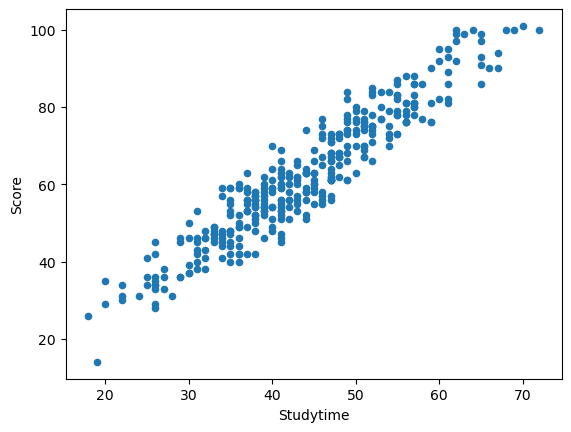

In [23]:
df.plot.scatter(x='Studytime', y='Score')

## (4) 欠損値のあるデータは削除する / Remove the rows which has NaN in the column Score.
欠損値がなくなっていることを確認しましょう。

1. 欠損値があるか確認
1. 欠損値を削除/置換/補完
1. 欠損値がなくなったことを確認

[Week 4: dropna](Ex_Week4.ipynb#removenan)

In [24]:
df.shape

(395, 2)

In [25]:
# 欠損値があるか確認
print(df.isnull().sum())

Studytime    33
Score         0
dtype: int64


In [26]:
# 欠損値のある行を削除
df2 = df.dropna(subset=['Studytime'])
df2.shape

(362, 2)

In [27]:
# 欠損値がなくなったことを確認
print(df2.isnull().sum())

Studytime    0
Score        0
dtype: int64


## (5) 数学の成績と勉強時間をそれぞれヒストグラムにしてプロットしてみましょう。
ヒストグラムのプロットの仕方は4週目でやりました。

[matplotlib でヒストグラムを描く@Pythonでデータサイエンス](https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)<br>
[Week 4: visualization](Ex_Week4.ipynb#scatterplot)

In [28]:
# Histogram of Math Score


In [29]:
# Histogram of Studytime


Subplot でまとめてプロットしてみます。

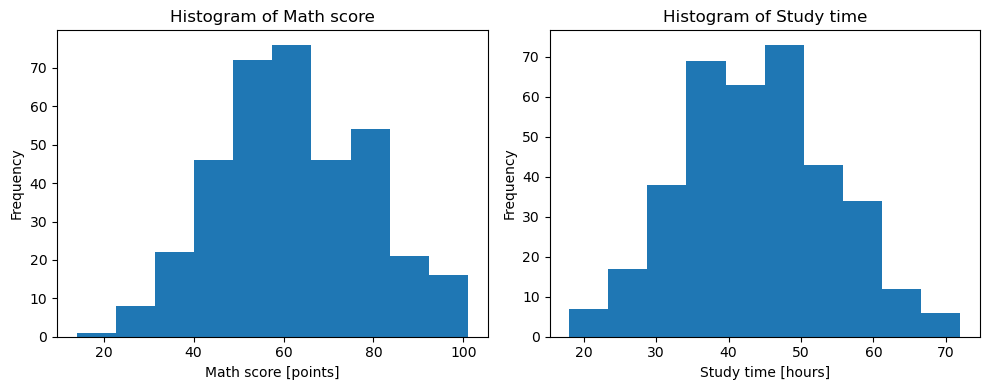

In [30]:
fig = plt.figure(figsize=(10, 4))

# left (studytime)
ax1 = fig.add_subplot(1, 2, 1)
plt.hist(df2.Score)
ax1.set_title("Histogram of Math score")
ax1.set_xlabel("Math score [points]")
ax1.set_ylabel("Frequency")

# right (Math score)
ax2 = fig.add_subplot(1, 2, 2)
plt.hist(df2.Studytime)
ax2.set_title("Histogram of Study time")
ax2.set_xlabel("Study time [hours]")
ax2.set_ylabel("Frequency")

# show plots
fig.tight_layout()
# fig.show()

## (6) 変数を準備する。/ Prepare the varialbes for the analysis.
+ 説明変数 (df_x) / Explanatory variable: 勉強時間(Studytime)
+ 目的変数 (df_y) / Object variable: 最終成績(Score)

をDataFrameから抽出します。元のデータ`df`ではなくて、欠損値を削除したデータ`df2`を使うように気を付けてください。<br>
Extract G2 and G3 from the DataFrame, `df2`. Please note that you should use `df2` instead of `df`, the original DataFrame.<br>

PandasのDataFrameから1行を抽出した後、'.values'を使って、numpyのndarray に変換する必要があります。<br>
`type`で変数の型を確認してみてください。<br>
<br>
After you extract a column from a DataFrame, you need to convert it to ndarray format of numpy by using '.values'.<br>
Please check the format of variables with `type`.

In [31]:
# データを準備 / Prepare data
# 線形回帰の関数に変数を入力する際に、DataFrameではなくて、numpy配列でないといけないので、変換する。
# You have to convert a Series to a numpy array to use it as an input of linear regression.
# Explanatory variable (Studytime)
x = df2.Studytime.values

# Check the type
print(type(x))

# Objective variable (Score)
y = df2.Score.values

# Check the type
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## (7) scikit-learnのmodel.fitではデータの次元を明示する必要がある
Data dimension has to be defined explicitly for the analysis with model.fit of scikit-learn.

In [32]:
# shapeを確認 / check the size of the array
print(np.shape(x))
print(np.shape(y))

# reshapeを使って各データを1Dデータと明示する / Define the dimension of the array explicitly with reshape.
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


# shapeで確認（reshapeの効果を確認する）/ check the size of the array again, then verify how reshape works.
print(np.shape(x))
print(np.shape(y))

# (35, 1) というように、一列と明記されていればOK。If it explicitly shows it's one dimensional array as (35,1), it's fine.

(362,)
(362,)
(362, 1)
(362, 1)


## (8) 線形回帰をする / Apply linear regression.

In [33]:
# 線形回帰のインスタンスを生成 / create an instance of simple regression
model = linear_model.LinearRegression()

# 学習実行 / apply fit
model.fit(x, y)

# xに対する予測値を計算 / obtain the predicted value.
reg_y = model.predict(x)


## (9) パラメータ算出 / Calculate important parameters

In [34]:
# 回帰係数 / Regression coefficient
reg_a = model.coef_

# 回帰定数 / Regression constant
reg_b = model.intercept_

# .predict(x)で得られたxに対する予測値は、回帰係数と回帰定数を使って以下のように計算したものと同じ。
# reg_y = reg_a*x+reg_b

# 決定係数 / Coefficient of determination
r2 =  model.score(x, y)

print(reg_a)
print(reg_b)
print(r2)

[[1.499]]
[-3.487]
0.8932046483506119


## (10) 描画 / Visualization

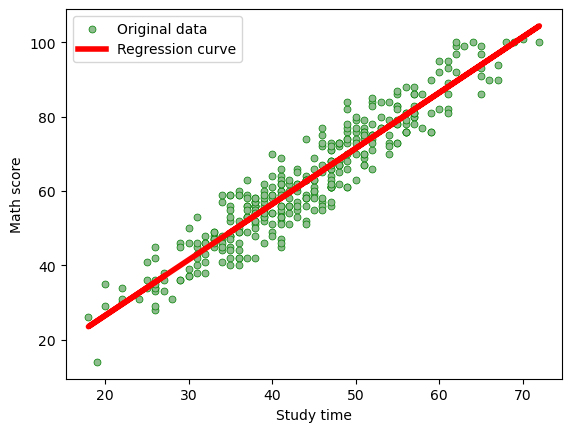

In [35]:
# fig, axオブジェクトの作成
fig, ax1 = plt.subplots()

# 軸のラベルを設定する。/ Set label of the axes.
ax1.set_xlabel('Study time')
ax1.set_ylabel('Math score')

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。/ Plot data. Set label, thickness and the position of the legend.
ax1.scatter(x, y, label='Original data', s=100, c='darkseagreen', marker='.', alpha=1, linewidth=0.5, edgecolors='green')
ax1.plot(x, reg_y, label='Regression curve', linewidth=4, color='red')

# reg_y = reg_a*x+reg_b
# ax1.plot(x, reg_a*x+reg_b, label='Regression curve', linewidth=3, color='red')

# グラフを表示する。/ Display a figure.
plt.legend()

plt.show()
plt.close()

# 上級者向け：Scikit-learn で提供されているサンプルデータを用いて、重回帰分析を行ってください。
For advanced students: Please carry out multiple regression analysis on sample data provided by Scikit-learn.


**重回帰分析は単回帰分析と全く同じコードでかけます。<br>
説明変数が1列だと単回帰分析、複数列だと重回帰分析になります。**

サンプルデータ / Sample data : [Diabetes Data Set](https://archive.ics.uci.edu/ml/datasets/diabetes)

* age: 年齢 / age
* sex: 性別 / sex
* bmi: BMI
* map: 平均血圧 / blood pressure
* tc: 総コレステロール / Total cholesterol
* ldl: 悪玉コレステロール / lDL-cholesterol
* hdl: 善玉コレステロール / HDL-cholesterol
* tch: 血清測定
* itg: 血清測定
* glu: 血清測定(グルコース)
* target: １年後の疾患進行度 / Disease progression after 1 year

[参考サイト: scikit-learnのデータセットで糖尿病について知る](https://rimever.hatenablog.com/entry/2018/12/26/070000)

In [36]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df2= pd.DataFrame(diabetes.target, columns=['Target'])
# CSVファイルから読み込んでも構いません。You can use a csv file.
# df = pd.read_csv('data/w6_diabetes_dataset.csv')


## データの内容をチェック / Check the content of the data.

[Pandas のデータフレームを確認する @ Pandasでデータサイエンス](https://pythondatascience.plavox.info/pandas/%E3%83%87%E3%83%BC%E3%82%BF%E3%83%95%E3%83%AC%E3%83%BC%E3%83%A0%E3%82%92%E7%A2%BA%E8%AA%8D)<br>
[pandas.DataFrame.info @ pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


## データのサイズをチェック / Check the size of the data.
[Week 2: shape, size, and len](Ex_Week2.ipynb#shape)<br>
[pandasで行数、列数、全要素数（サイズ）を取得](https://note.nkmk.me/python-pandas-len-shape-size/)<br>


In [39]:
df.shape

(442, 10)

In [40]:
df2.shape

(442, 1)

## 欠損値がないかチェック

In [41]:
print(df.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [42]:
print(df2.isnull().sum())

Target    0
dtype: int64


## 442人の糖尿病の１年後の疾患進行度の状況を把握します。/ Check disease progression after 1 year.
１年後の疾患進行度`target`のヒストグラムを書いてみましょう。<br>
Please draw a histogram of didease progression, `target`.

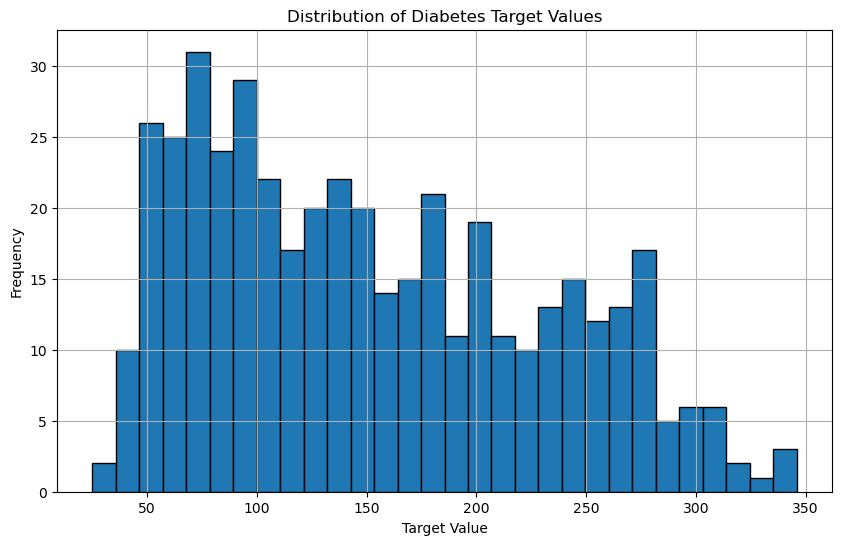

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df2['Target'], bins=30, edgecolor='black')
plt.title('Distribution of Diabetes Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 重回帰分析 / Multiple regression analysis
+ 目的変数 / Object variable: `target` (disease prograssion after 1 year)
+ 説明変数 / Explanatory variable: その他の変数 / other variables

として、重回帰分析をしてください。<br>
Carry out multiple regression analysis.<br>
<br>

１年後の疾患進行度と何か最も相関が高いか、回帰係数から検討してください。<br>
Please find a variable which has the highest correlation with disease progression after 1 year.<br>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 特徴量と目的変数の準備
X = df  # 特徴量
y = df2['Target']  # 目的変数

# データの分割（訓練用とテスト用）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの訓練
model.fit(X_train, y_train)

# テストデータに対する予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

# 特徴量ごとの係数を取得
coefficients = model.coef_

# 特徴量の名前と係数を結合
feature_coefficients = pd.DataFrame(list(zip(diabetes.feature_names, coefficients)), columns=['Feature', 'Coefficient'])

feature_coefficients

3424.2593342986925 0.3322332173106183


,Feature,Coefficient
0,age,-35.550251
1,sex,-243.165090
2,bmi,562.762347
3,bp,305.463482
4,s1,-662.702901
5,s2,324.207385
6,s3,24.748795
7,s4,170.324962
8,s5,731.637435
9,s6,43.030931


## 1年後の糖尿病患者の疾患進行度とBMIとの相関関係 
## Correlation between disease progression and BMI

1年後の糖尿病患者の疾患進行度を横軸、BMIを縦軸にとって、散布図をプロットしてください。<br>
Please draw a scattering plot with `target` in horizontal axis and BMI in vertical axis.

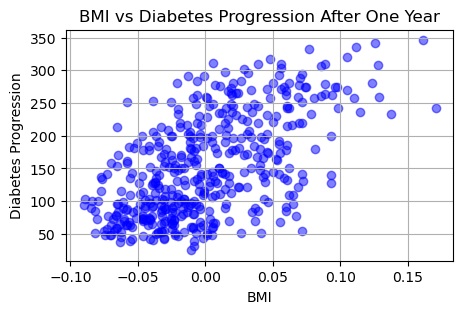

In [45]:
plt.figure(figsize=(5,3))
plt.scatter(df['bmi'], df2['Target'], color='blue', alpha=0.5)
plt.title('BMI vs Diabetes Progression After One Year')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.grid(True)
plt.show()

## データの見立て

授業では省略しましたが、解析をするときには、どのような解析手法を選ぶか考えるうえで、データを大まかに把握することが大事です。<br>
Seaborn を使って、データの大まかな傾向を把握してみましょう。<br>
[Python, pandas, seabornでペアプロット図（散布図行列）を作成](https://note.nkmk.me/python-seaborn-pandas-pairplot/)<br>
[Diabetes visulalization with seaborn](https://www.kaggle.com/kunalvashisht/diabetes-visualization-with-seaborn)<br>

## Scikit-learn の他のサンプルデータでも解析してみましょう。 / Please try other sample data provided by Scikit-learn. 
* [scikit-learn に付属しているデータセット](https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)
* [Wine Quality Data Set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)